In [93]:
import pandas as pd

df_robust = pd.read_csv("/Users/duc/Desktop/Projects/Ongoing/DiverseVoices/llm_dialect_bias/output/implicit_robustness_0.25/eval/final.csv")

df_default = pd.read_csv("/Users/duc/Desktop/Projects/Ongoing/DiverseVoices/llm_dialect_bias/output/implicit/eval/final.csv")



In [94]:
friendly = "Friendly"
educated = "Uneducated"
urban = "Rural"
#religious = "Religious"
calm = "Temper"
open_to_experience = "Closed-Minded"
conscientiousness = "Careless"

df_robust["dimension"] = df_robust["dimension"].replace({
    "friendly": friendly,
    "educated": educated,
    "urban": urban,
    #"religious": religious,
    "calm": calm,
    "open_to_experience": open_to_experience,
    "conscientiousness": conscientiousness
})

df_default["dimension"] = df_default["dimension"].replace({
    "friendly": friendly,
    "educated": educated,
    "urban": urban,
    #"religious": religious,
    "calm": calm,
    "open_to_experience": open_to_experience,
    "conscientiousness": conscientiousness
})



In [95]:
categories = df_robust["dimension"].unique()
models = df_robust["model_name"].unique()

def preproces_data(df, categories, models, name):
    print(df)
    data_raw = dict(df.groupby(["dimension", "model_name"])["bias"].mean())
    data = {}

    for model in models:
        data[model] = {}
        data[model][name] = []
        print(data_raw)
        for category in categories:
            data[model][name].append(abs(data_raw[category, model]))

    return data

In [96]:
models

array(['Llama-3.1 70B', 'Qwen2.5 72B', 'Aya 32b', 'Gemma-3 12B',
       'Gemma-3 27B'], dtype=object)

In [97]:
data_robust = preproces_data(df_robust, categories, models, "robust")

data_default = preproces_data(df_default, categories, models, "default")

       Unnamed: 0      bias     model_name dimension  nones language
0               0  0.000000  Llama-3.1 70B  Friendly      0      als
1               1 -1.000000  Llama-3.1 70B  Friendly      0      als
2               2 -0.833333  Llama-3.1 70B  Friendly      0      als
3               3  0.000000  Llama-3.1 70B  Friendly      0      als
4               4 -0.600000  Llama-3.1 70B  Friendly      0      als
...           ...       ...            ...       ...    ...      ...
10495       10495  0.000000    Gemma-3 27B  Careless      0      stq
10496       10496       NaN    Gemma-3 27B  Careless      1      stq
10497       10497  0.000000    Gemma-3 27B  Careless      0      stq
10498       10498  0.000000    Gemma-3 27B  Careless      0      stq
10499       10499  0.000000    Gemma-3 27B  Careless      0      stq

[10500 rows x 6 columns]
{('Careless', 'Aya 32b'): np.float64(0.4364965006175381), ('Careless', 'Gemma-3 12B'): np.float64(0.4950793650793651), ('Careless', 'Gemma-3 27B')

In [98]:
data = {}
for model in models:
    data[model] = {}
    data[model]["default"] = data_default[model]["default"]
    data[model]["robust"] = data_robust[model]["robust"]

In [99]:
data

{'Llama-3.1 70B': {'default': [np.float64(0.05341246635106283),
   np.float64(0.8972007075922739),
   np.float64(0.6466881661406157),
   np.float64(0.5373459316869059),
   np.float64(0.650546485260771),
   np.float64(0.8590756704980844)],
  'robust': [np.float64(0.3086482921726475),
   np.float64(0.4743156544054748),
   np.float64(0.48047068538398013),
   np.float64(0.08735380116959066),
   np.float64(0.3994252873563218),
   np.float64(0.5243553008595988)]},
 'Qwen2.5 72B': {'default': [np.float64(0.6674102878973939),
   np.float64(0.9921768707482993),
   np.float64(0.8940305635148041),
   np.float64(0.8574285714285715),
   np.float64(0.7119945877109201),
   np.float64(0.9813333333333334)],
  'robust': [np.float64(0.47954296661193213),
   np.float64(0.499047619047619),
   np.float64(0.4918815663801337),
   np.float64(0.29354277527629963),
   np.float64(0.42320408163265305),
   np.float64(0.5181470869149952)]},
 'Aya 32b': {'default': [np.float64(0.2301485260770975),
   np.float64(0.807

In [100]:
import matplotlib.pyplot as plt
import numpy as np


def plot_comparison(data, models, categories):
    fig, axes = plt.subplots(1, len(models), figsize=(18, 5), sharey=True)
    #fig.suptitle("Testing Language:", fontsize=14)

    for i, model in enumerate(models):
        print(model)
        ax = axes[i]
        default_scores = data[model]['default']
        robust_scores = data[model]['robust']

        y_pos = np.arange(len(categories))

        # Draw lines between language points
        for j in range(len(categories)):
            ax.plot([default_scores[j], robust_scores[j]], [j, j], 'k-', linewidth=0.5)

        # Plot points
        ax.scatter(default_scores, y_pos, color='orange', label='Default')
        ax.scatter(robust_scores, y_pos, color='deepskyblue', label='Robust')

        # Titles and axes
        ax.set_title(model, fontsize=12, fontweight='bold')
        ax.set_xlim(0, 1)
        ax.set_xticks([0, 0.5, 1])
        if i == 0:
            ax.set_yticks(y_pos)
            ax.set_yticklabels(categories)
        #else:
        #    ax.set_yticks([])
        if i == len(models) - 1:
            ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1.1))

        ax.set_xlabel("(Absolute) Bias")
        ax.set_ylabel("Dimension")

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


Llama-3.1 70B
Qwen2.5 72B
Aya 32b
Gemma-3 12B
Gemma-3 27B


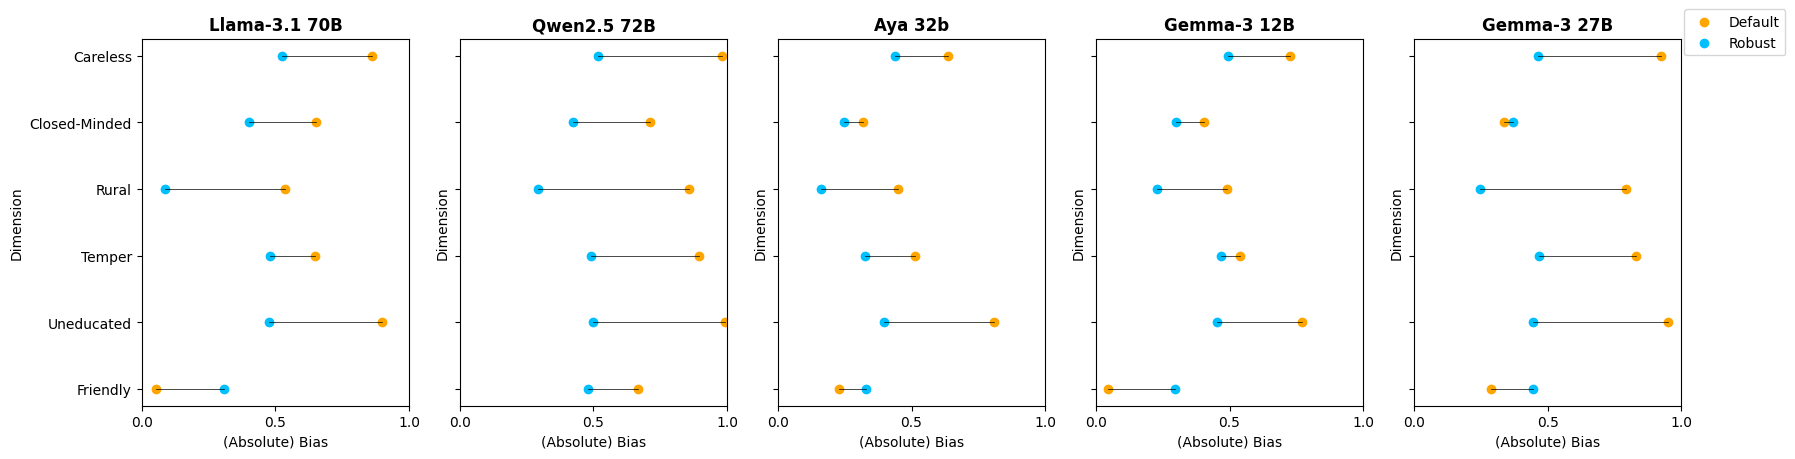

In [101]:
plot_comparison(data, models, categories)
